## 获取开发者地理信息数据

In [2]:
import json
import csv
from clickhouse_driver import Client

# 配置远程 ClickHouse 的连接参数
client = Client(
    host='cc-2ze7189376o5m9759.public.clickhouse.ads.aliyuncs.com',
    port=9000,  # ClickHouse 默认端口为 9000
    user='user',
    password='password',
    database='database'  # 可选
)
# print(client.execute("SHOW TABLES"))


query = f"""
                SELECT
    tmp.actor_id, tmp.lateset_location, l.country, l.administrative_area_level_1, l.longitude, l.latitude
FROM
    (SELECT actor_id, argMax(g.location, g.updated_at) AS lateset_location
    FROM events e, gh_user_info g
    WHERE platform = 'GitHub' AND EXTRACT(YEAR FROM e.created_at) = 2024 AND e.actor_id=g.id
    GROUP BY e.actor_id) tmp, location_info l
WHERE
    l.location = tmp.lateset_location AND l.status='normal'
            """

result = client.execute(query)


# 将结果写入csv文件
with open('location.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['actor_id', 'lateset_location', 'country',
                    'administrative_area_level_1', 'longitude', 'latitude'])
    for row in result:
        writer.writerow(row)


KeyboardInterrupt: 

In [3]:
import json
import csv
from clickhouse_driver import Client

# 配置远程 ClickHouse 的连接参数
client = Client(
    host='cc-2ze7189376o5m9759.public.clickhouse.ads.aliyuncs.com',
    port=9000,  # ClickHouse 默认端口为 9000
    user='user',
    password='password',
    database='database'  # 可选
)
# print(client.execute("SHOW TABLES"))

query2023 = f"""
                SELECT
    tmp.actor_id, tmp.lateset_location, l.country, l.administrative_area_level_1, l.longitude, l.latitude
FROM
    (SELECT actor_id, argMax(g.location, g.updated_at) AS lateset_location
    FROM events e, gh_user_info g
    WHERE platform = 'GitHub' AND EXTRACT(YEAR FROM e.created_at) = 2023 AND e.actor_id=g.id
    GROUP BY e.actor_id) tmp, location_info l
WHERE
    l.location = tmp.lateset_location AND l.status='normal'
            """

result = client.execute(query)


# 将结果写入csv文件
with open('location2023.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['actor_id', 'lateset_location', 'country',
                    'administrative_area_level_1', 'longitude', 'latitude'])
    for row in result:
        writer.writerow(row)

## 转化为可导入的js文件

In [ ]:
import pandas as pd
import numpy as np

# 读取CSV文件
file_path = 'location.csv'
df = pd.read_csv(file_path)

# 提取经度和纬度列
longitude = df['longitude'].values
latitude = df['latitude'].values

# 合并经度和纬度，并转换为Float32Array
float32_array = np.column_stack(
    (longitude, latitude)).flatten().astype(np.float32)
print(float32_array)
# 保存到本地文件
output_file_path = 'float32_array.js'
with open(output_file_path, 'w') as f:
    f.write(f'const data = new Float32Array({float32_array.tolist()});')

print(f"Float32Array data saved to {output_file_path}")

## 生成国家开发者数量的数据

In [8]:
import pandas as pd
import numpy as np

# 读取CSV文件
file_path = 'actor_location.csv'
df = pd.read_csv(file_path)

# 生成新的表，用于展示country列中的出现的数量
country_count = df['country'].value_counts().reset_index()

# 展示country_count
print(country_count)

# 保存为csv
country_count.to_csv('country_count2023.csv', index=False)

                                  country   count
0                           United States  236899
1                                   China  113893
2                                   India  107067
3                                  Brazil   83932
4                                 Germany   64836
..                                    ...     ...
250                             Jan Mayen       1
251                              Tanzânia       1
252  United States Minor Outlying Islands       1
253                                 Nauru       1
254                        Norfolk Island       1

[255 rows x 2 columns]


## 生成中国开发者数量的数据

In [15]:
import pandas as pd
import numpy as np

# 读取CSV文件
file_path = 'location.csv'
df = pd.read_csv(file_path)

# 提取country列中是China的行
df1 = df[df['country'].isin(['China'])]

# 提取Hong kong、Taiwan、Macao的行
df2 = df[df['country'].isin(['Hong Kong', 'Taiwan', 'Macao'])]

# 映射字典，将不同的地名映射到标准地名
province_mapping = {
    'Bei Jing Shi': 'Beijing',
    'Shang Hai Shi': 'Shanghai',
    'Guang Dong Sheng': 'Guangdong',
    'Si Chuan Sheng': 'Sichuan',
    'Zhe Jiang Sheng': 'Zhejiang',
    'Hu Bei Sheng': 'Hubei',
    'Jiang Su Sheng': 'Jiangsu',
    'Shan Xi Sheng': 'Shaanxi',
    'Shan Dong Sheng': 'Shandong',
    'An Hui Sheng': 'Anhui',
    'Liao Ning Sheng': 'Liaoning',
    'Hei Long Jiang Sheng': 'Heilongjiang',
    'Guang Xi Zhuang Zu Zi Zhi Qu': 'Guangxi',
    'Fu Jian Sheng': 'Fujian',
    'He Nan Sheng': 'Henan',
    'Tian Jin Shi': 'Tianjin',
    'Jiang Xi Sheng': 'Jiangxi',
    'He Bei Sheng': 'Hebei',
    'Ningxia Hui': 'Ningxia',
    'Gui Zhou Sheng': 'Guizhou',
    'Xinjiang Uygur': 'Xinjiang',
    'Inner Mongolia': 'Inner Mongolia',
    'Tibet': 'Tibet',
    'Qinghai': 'Qinghai',
    'Xinjiang Uygur': 'Xinjiang',
    'Yun Nan Sheng': 'Yunnan',
    'Ji Lin Sheng': 'Jilin',
    'Gan Su Sheng': 'Gansu',
    'Chong Qing Shi': 'Chongqing',
    '湖南省': 'Hunan',
    'Hai Nan Sheng': 'Hainan',
    'Qing Hai Sheng': 'Qinghai',
    '陕西省': 'Shaanxi',
    'Nei Meng Gu Zi Zhi Qu': 'Inner Mongolia',
    '上海市': 'Shanghai',
    '广东省': 'Guangdong',
    '北京市': 'Beijing',
    '湖北省': 'Hubei',
    'Guangdong Province': 'Guangdong',
    'Guangxi Zhuang': 'Guangxi',
    'Hu Nan Sheng': 'Hunan',
    'Xin Jiang Wei Wu Er Zi Zhi Qu': 'Xinjiang',
    'Hu Nan': 'Hunan',
    '海南省': 'Hainan',
    '河南省': 'Henan',
    'SC': 'Sichuan',
    '江西省': 'Jiangxi',
    '辽宁省': 'Liaoning'

}


print(df1.columns)


# 使用映射字典进行省份标准化
df1['administrative_area_level_1'] = df1['administrative_area_level_1'].map(province_mapping).fillna(df1['administrative_area_level_1'])



# 统计 administrative_area_level_1 中不同区域的数量
province_count1 = df1['administrative_area_level_1'].value_counts().reset_index()

# 将province_count1的第一列名字改为province
province_count1.columns = ['province', 'count']

province_count2 = df2['country'].value_counts().reset_index()
province_count2.columns = ['province', 'count']
# 将province_count1和province_count2合并，并排序
province_count = pd.concat([province_count1, province_count2], ignore_index=True)

# 按照count降序排序
province_count = province_count.sort_values(by='count', ascending=False)

print(province_count)

# 保存为csv
province_count.to_csv('province_count.csv', index=False)

Index(['actor_id', 'lateset_location', 'country',
       'administrative_area_level_1', 'longitude', 'latitude'],
      dtype='object')
          province  count
0          Beijing  38323
1         Shanghai  28393
2        Guangdong  24959
31          Taiwan  15894
3         Zhejiang  15816
4          Jiangsu   9369
5          Sichuan   8186
32       Hong Kong   6625
6            Hubei   5732
7          Shaanxi   3669
8           Fujian   2853
9         Shandong   2737
10           Hunan   2366
11           Anhui   2242
12       Chongqing   2206
13        Liaoning   1809
14         Tianjin   1621
15           Henan   1431
16    Heilongjiang    846
17           Hebei    665
18         Jiangxi    658
19          Yunnan    611
20         Guangxi    539
21           Jilin    465
22          Shanxi    365
23         Guizhou    319
33           Macao    259
24           Gansu    220
25          Hainan    210
26  Inner Mongolia    165
27        Xinjiang    124
28         Ningxia     41
29    

/var/folders/yt/zyyfjptj5c39_16l_f7td1mm0000gn/T/ipykernel_82278/1567639134.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['administrative_area_level_1'] = df1['administrative_area_level_1'].map(province_mapping).fillna(df1['administrative_area_level_1'])


## 获取国内开发者地理数据

In [16]:
import json
import csv
from clickhouse_driver import Client

# 配置远程 ClickHouse 的连接参数
client = Client(
    host='cc-2ze7189376o5m9759.public.clickhouse.ads.aliyuncs.com',
    port=9000,  # ClickHouse 默认端口为 9000
    user='user',
    password='password',
    database='database'  # 可选
)
# print(client.execute("SHOW TABLES"))


query = f"""
                SELECT
    tmp.actor_id, 
    tmp.lateset_location, 
    l.country, 
    l.administrative_area_level_1, 
    l.longitude, 
    l.latitude
FROM
    (SELECT actor_id, argMax(g.location, g.updated_at) AS lateset_location
     FROM events e, gh_user_info g
     WHERE platform = 'GitHub' 
       AND EXTRACT(YEAR FROM e.created_at) = 2024 
       AND e.actor_id = g.id
     GROUP BY e.actor_id) tmp, 
    location_info l
WHERE
    l.location = tmp.lateset_location 
    AND l.status = 'normal'
    AND l.country IN ('China', 'Hong Kong', 'Taiwan', 'Macao');

            """

# 执行查询
result = client.execute(query)

# 将结果处理，更新 `administrative_area_level_1` 并重命名为 `province`
processed_result = []
for row in result:
    actor_id, lateset_location, country, administrative_area_level_1, longitude, latitude = row
    # 如果 country 是 'Hong Kong', 'Taiwan', 'Macao'，将 administrative_area_level_1 设置为对应的 country 值
    if country in ['Hong Kong', 'Taiwan', 'Macao']:
        administrative_area_level_1 = country  # 修改为对应的 country 值
    # 构造新的行数据，列名 `administrative_area_level_1` 替换为 `province`
    processed_result.append([actor_id, lateset_location, country,
                            administrative_area_level_1, longitude, latitude])

# 将处理后的结果写入 CSV 文件
with open('China_location.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    # 写入标题，列名 `administrative_area_level_1` 替换为 `province`
    writer.writerow(['actor_id', 'lateset_location', 'country',
                    'province', 'longitude', 'latitude'])
    # 写入每一行数据
    writer.writerows(processed_result)

print("Data processing completed and saved to 'China_location.csv'")

Data processing completed and saved to 'China_location.csv'


## 开发者活跃时间

### Github平台

In [ ]:
import numpy as np
from clickhouse_driver import Client

# 配置远程 ClickHouse 的连接参数
client = Client(
    host='cc-2ze7189376o5m9759.public.clickhouse.ads.aliyuncs.com',
    port=9000,  # ClickHouse 默认端口为 9000
    user='user',
    password='password',
    database='database'  # 可选
)
# print(client.execute("SHOW TABLES"))


query = f"""
SELECT groupArray(count) AS data
FROM (SELECT toDayOfWeek(created_at) AS weekday, toHour(created_at) AS hour, COUNT() AS count
      FROM events
      WHERE toYear(created_at) = 2024
        and platform = 'GitHub'
      GROUP BY weekday, hour
      ORDER BY weekday, hour)
;
"""

result = client.execute(query)


data = result[0][0]

# 转换为 numpy 数组
data_array = np.array(data)

# Min-Max 放缩
data_min = data_array.min()
data_max = data_array.max()
scaled_data = 1 + (data_array - data_min) * (10 - 1) / (data_max - data_min)

# 结果保留到整数
scaled_data = scaled_data.astype(int)
# 输出放缩后的数据
scaled_data = scaled_data.tolist()  # 如果需要将其转为列表

# 转换为字符串并去掉空格
param = "[" + ",".join(map(str, scaled_data)) + "]"
print(param)

# 将这个param复制到 https://blog.frankzhao.cn/images/working_hour_distribution.svg?bg_color=white&text_color=black&data= 之后，可以得到一个svg图片



[4,5,3,4,3,4,6,6,7,7,7,7,10,9,8,8,8,7,7,6,6,5,4,4,5,5,4,4,3,4,6,6,7,7,7,7,9,8,8,8,7,7,7,6,6,5,4,3,4,5,3,4,3,4,5,6,6,7,6,6,9,8,8,8,7,7,7,6,5,5,4,3,4,5,3,4,3,4,5,5,6,7,6,6,9,8,8,8,7,6,7,5,5,5,3,3,4,5,3,4,2,3,5,5,6,6,6,6,9,7,7,7,6,6,6,5,4,4,3,2,3,3,1,2,1,1,3,2,2,3,3,3,7,5,4,4,4,3,4,3,2,2,1,1,2,3,1,1,1,1,2,2,2,3,3,3,7,5,4,5,4,4,5,3,3,3,2,1]


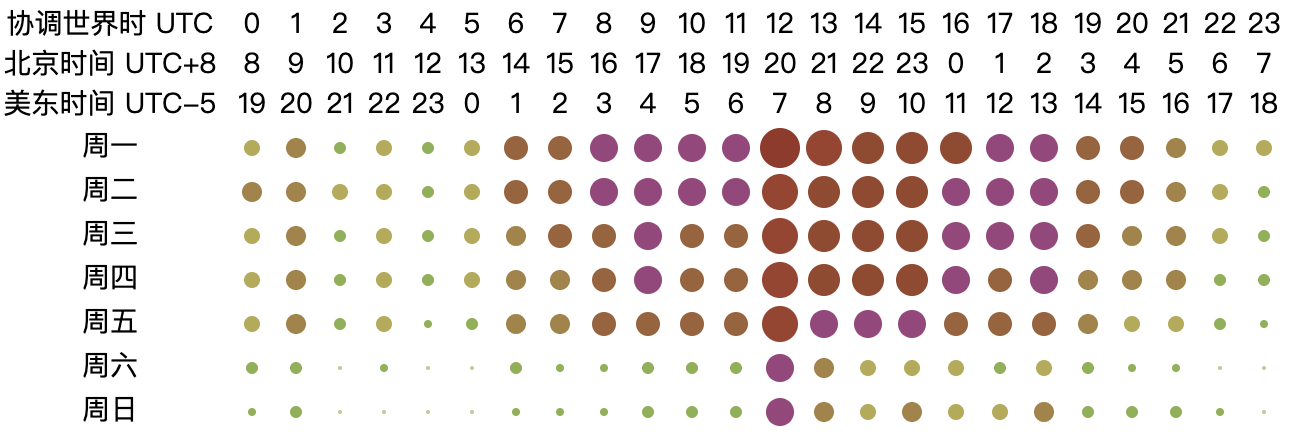

### Gitee平台

In [19]:
import numpy as np
from clickhouse_driver import Client

# 配置远程 ClickHouse 的连接参数
client = Client(
    host='cc-2ze7189376o5m9759.public.clickhouse.ads.aliyuncs.com',
    port=9000,  # ClickHouse 默认端口为 9000
    user='user',
    password='password',
    database='database'  # 可选
)
# print(client.execute("SHOW TABLES"))


query = f"""
SELECT groupArray(count) AS data
FROM (SELECT toDayOfWeek(created_at) AS weekday, toHour(created_at) AS hour, COUNT() AS count
      FROM events
      WHERE toYear(created_at) = 2024
        and platform = 'Gitee'
      GROUP BY weekday, hour
      ORDER BY weekday, hour)
;
"""

result = client.execute(query)


data = result[0][0]

# 转换为 numpy 数组
data_array = np.array(data)

# Min-Max 放缩
data_min = data_array.min()
data_max = data_array.max()
scaled_data = 1 + (data_array - data_min) * (10 - 1) / (data_max - data_min)

# 结果保留到整数
scaled_data = scaled_data.astype(int)
# 输出放缩后的数据
scaled_data = scaled_data.tolist()  # 如果需要将其转为列表

# 转换为字符串并去掉空格
param = "[" + ",".join(map(str, scaled_data)) + "]"
print(param)

# 将这个param复制到 https://blog.frankzhao.cn/images/working_hour_distribution.svg?bg_color=white&text_color=black&data= 之后，可以得到一个svg图片

[1, 7, 8, 8, 3, 2, 8, 9, 9, 8, 4, 6, 6, 5, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 9, 9, 3, 2, 8, 9, 10, 9, 4, 6, 6, 5, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 9, 9, 3, 3, 9, 9, 9, 9, 5, 4, 4, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 9, 8, 3, 2, 8, 9, 9, 8, 4, 6, 6, 5, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 9, 8, 3, 2, 8, 9, 9, 9, 5, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 4, 2, 1, 4, 5, 5, 5, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


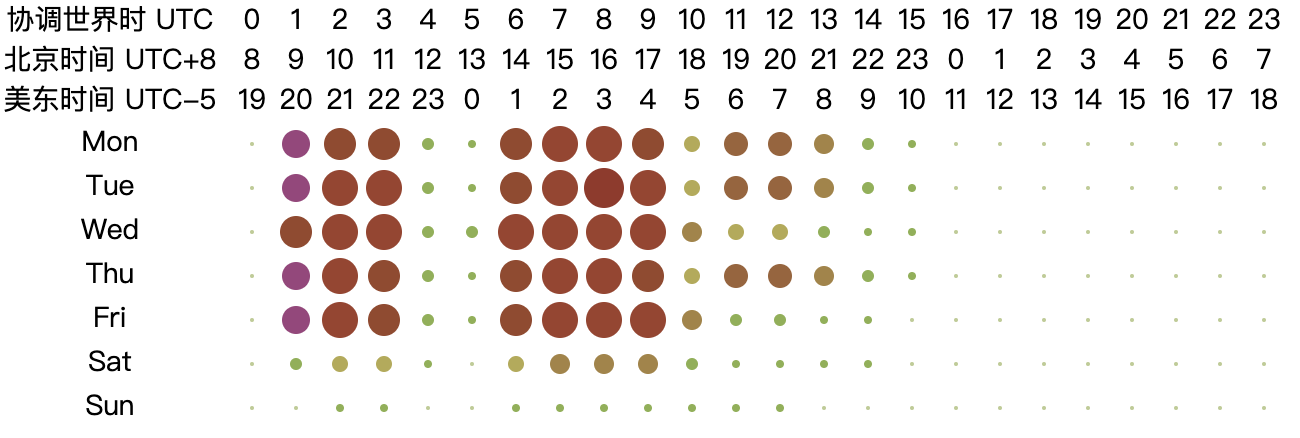

In [30]:
import numpy as np
from clickhouse_driver import Client

# 配置远程 ClickHouse 的连接参数
client = Client(
    host='cc-2ze7189376o5m9759.public.clickhouse.ads.aliyuncs.com',
    port=9000,  # ClickHouse 默认端口为 9000
    user='user',
    password='password',
    database='database'  # 可选
)
# print(client.execute("SHOW TABLES"))


query = f"""
SELECT groupArray(count) AS data
FROM (SELECT toDayOfWeek(created_at) AS weekday, toHour(created_at) AS hour, COUNT() AS count
      FROM events
      WHERE toYear(created_at) = 2024
        and platform = 'GitHub'
        and issue_author_type != 'Bot'
      GROUP BY weekday, hour
      ORDER BY weekday, hour)
;
"""

result = client.execute(query)


data = result[0][0]

# 转换为 numpy 数组
data_array = np.array(data)

# Min-Max 放缩
data_min = data_array.min()
data_max = data_array.max()
scaled_data = 1 + (data_array - data_min) * (10 - 1) / (data_max - data_min)

# 结果保留到整数
scaled_data = scaled_data.astype(int)
# 输出放缩后的数据
scaled_data = scaled_data.tolist()  # 如果需要将其转为列表

# 转换为字符串并去掉空格
param = "[" + ",".join(map(str, scaled_data)) + "]"
print(param)

# 将这个param复制到 https://blog.frankzhao.cn/images/working_hour_distribution.svg?bg_color=white&text_color=black&data= 之后，可以得到一个svg图片

[2,2,2,2,2,3,4,6,7,8,7,7,7,8,9,9,8,7,7,6,6,5,4,3,3,3,3,3,3,3,5,6,8,8,8,7,7,9,9,10,9,8,7,7,6,6,4,4,3,3,3,3,3,3,5,6,8,8,7,7,7,9,9,9,8,8,7,6,6,5,4,3,3,3,3,3,3,3,4,6,7,8,7,7,7,9,9,9,8,7,7,6,6,5,4,3,3,3,3,3,2,3,4,6,7,7,7,6,6,7,8,8,7,6,6,5,5,4,3,2,2,1,1,1,1,1,1,2,2,2,2,2,2,2,3,3,3,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,2,2,2,2,1,1]


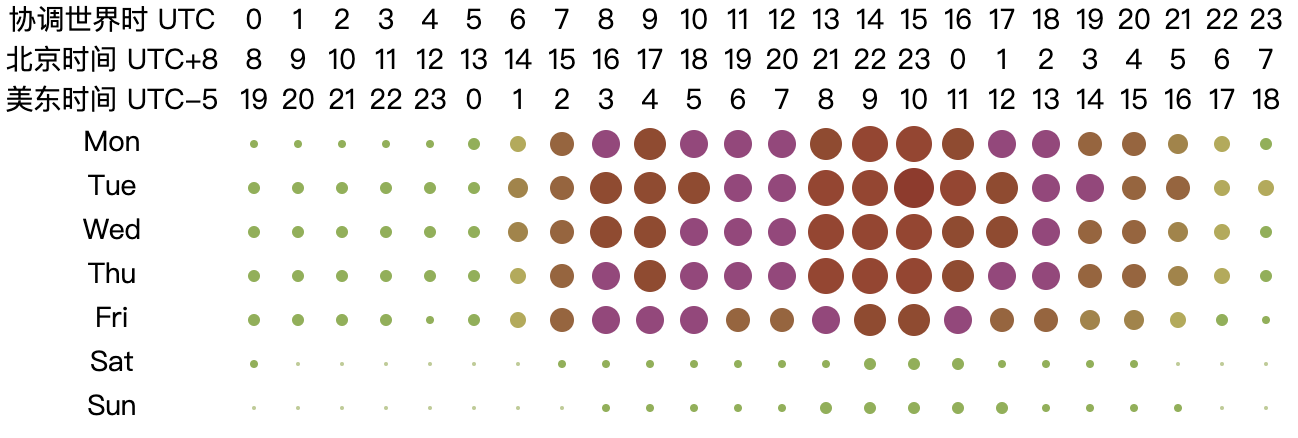

### DigitalPlatDev/FreeDomain

In [33]:
import numpy as np
from clickhouse_driver import Client

# 配置远程 ClickHouse 的连接参数
client = Client(
    host='cc-2ze7189376o5m9759.public.clickhouse.ads.aliyuncs.com',
    port=9000,  # ClickHouse 默认端口为 9000
    user='user',
    password='password',
    database='database'  # 可选
)
# print(client.execute("SHOW TABLES"))


query = f"""
SELECT groupArray(count) AS data
FROM (SELECT toDayOfWeek(created_at) AS weekday, toHour(created_at) AS hour, COUNT() AS count
      FROM events
      WHERE toYear(created_at) = 2024
        and platform = 'GitHub'
        and repo_id = 808144141
      GROUP BY weekday, hour
      ORDER BY weekday, hour)
;
"""

result = client.execute(query)


data = result[0][0]

# 转换为 numpy 数组
data_array = np.array(data)

# Min-Max 放缩
data_min = data_array.min()
data_max = data_array.max()
scaled_data = 1 + (data_array - data_min) * (10 - 1) / (data_max - data_min)

# 结果保留到整数
scaled_data = scaled_data.astype(int)
# 输出放缩后的数据
scaled_data = scaled_data.tolist()  # 如果需要将其转为列表

# 转换为字符串并去掉空格
param = "[" + ",".join(map(str, scaled_data)) + "]"
print(param)

# 将这个param复制到 https://blog.frankzhao.cn/images/working_hour_distribution.svg?bg_color=white&text_color=black&data= 之后，可以得到一个svg图片

[1,3,4,4,4,4,4,4,4,3,5,3,4,4,4,3,3,2,1,1,1,1,1,1,1,3,4,4,3,3,4,5,5,3,3,4,3,4,3,4,3,4,2,1,1,1,1,1,1,2,3,3,4,3,4,5,4,4,3,3,3,3,4,4,4,2,2,1,1,1,1,1,1,2,3,3,3,4,4,4,4,3,3,2,3,3,3,2,2,2,1,1,1,1,1,1,1,3,5,5,6,6,6,7,8,7,5,6,7,9,9,6,5,4,3,2,1,1,1,1,2,3,5,5,4,5,8,6,10,7,7,6,6,6,8,7,7,5,2,2,1,1,1,1,2,3,5,5,4,5,5,6,6,5,4,5,5,6,5,5,5,2,1,1,1,1,1,1]


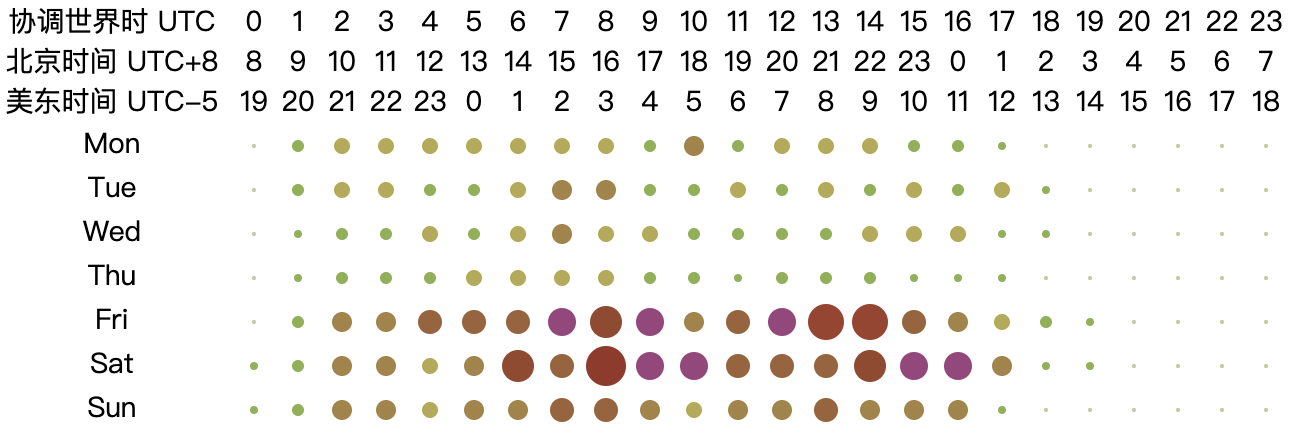

### NixOS/nixpkgs

In [34]:
import numpy as np
from clickhouse_driver import Client

# 配置远程 ClickHouse 的连接参数
client = Client(
    host='cc-2ze7189376o5m9759.public.clickhouse.ads.aliyuncs.com',
    port=9000,  # ClickHouse 默认端口为 9000
    user='user',
    password='password',
    database='database'  # 可选
)
# print(client.execute("SHOW TABLES"))


query = f"""
SELECT groupArray(count) AS data
FROM (SELECT toDayOfWeek(created_at) AS weekday, toHour(created_at) AS hour, COUNT() AS count
      FROM events
      WHERE toYear(created_at) = 2024
        and platform = 'GitHub'
        and repo_id = 4542716
      GROUP BY weekday, hour
      ORDER BY weekday, hour)
;
"""

result = client.execute(query)


data = result[0][0]

# 转换为 numpy 数组
data_array = np.array(data)

# Min-Max 放缩
data_min = data_array.min()
data_max = data_array.max()
scaled_data = 1 + (data_array - data_min) * (10 - 1) / (data_max - data_min)

# 结果保留到整数
scaled_data = scaled_data.astype(int)
# 输出放缩后的数据
scaled_data = scaled_data.tolist()  # 如果需要将其转为列表

# 转换为字符串并去掉空格
param = "[" + ",".join(map(str, scaled_data)) + "]"
print(param)

# 将这个param复制到 https://blog.frankzhao.cn/images/working_hour_distribution.svg?bg_color=white&text_color=black&data= 之后，可以得到一个svg图片

[3,2,2,1,1,1,3,4,4,5,4,5,5,8,8,7,6,6,6,6,7,6,5,4,2,1,1,1,1,1,3,5,5,5,5,5,6,7,7,6,6,5,5,7,8,6,6,4,3,2,2,1,1,1,3,4,5,5,5,4,6,7,8,7,6,5,6,6,7,6,5,4,3,2,1,1,1,1,3,5,5,6,4,5,5,6,7,6,6,5,5,6,7,6,4,4,3,2,2,1,1,1,3,5,5,5,4,5,5,6,7,6,6,5,5,6,6,6,5,3,3,2,2,1,1,1,2,3,4,4,4,5,5,8,8,7,6,5,6,5,5,5,5,3,3,2,2,2,1,1,2,2,4,4,4,5,6,8,10,7,7,6,6,6,7,6,5,3]


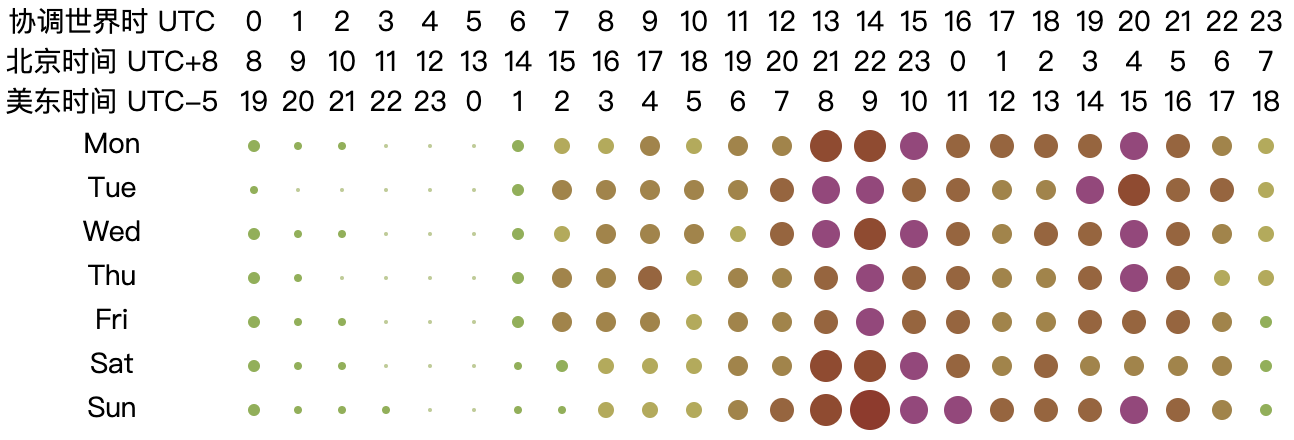

### digitalinnovationone/dio-lab-open-source

In [35]:
import numpy as np
from clickhouse_driver import Client

# 配置远程 ClickHouse 的连接参数
client = Client(
    host='cc-2ze7189376o5m9759.public.clickhouse.ads.aliyuncs.com',
    port=9000,  # ClickHouse 默认端口为 9000
    user='user',
    password='password',
    database='database'  # 可选
)
# print(client.execute("SHOW TABLES"))


query = f"""
SELECT groupArray(count) AS data
FROM (SELECT toDayOfWeek(created_at) AS weekday, toHour(created_at) AS hour, COUNT() AS count
      FROM events
      WHERE toYear(created_at) = 2024
        and platform = 'GitHub'
        and repo_id = 632909818
      GROUP BY weekday, hour
      ORDER BY weekday, hour)
;
"""

result = client.execute(query)


data = result[0][0]

# 转换为 numpy 数组
data_array = np.array(data)

# Min-Max 放缩
data_min = data_array.min()
data_max = data_array.max()
scaled_data = 1 + (data_array - data_min) * (10 - 1) / (data_max - data_min)

# 结果保留到整数
scaled_data = scaled_data.astype(int)
# 输出放缩后的数据
scaled_data = scaled_data.tolist()  # 如果需要将其转为列表

# 转换为字符串并去掉空格
param = "[" + ",".join(map(str, scaled_data)) + "]"
print(param)

# 将这个param复制到 https://blog.frankzhao.cn/images/working_hour_distribution.svg?bg_color=white&text_color=black&data= 之后，可以得到一个svg图片

[5,4,4,2,2,1,1,1,1,1,1,2,3,5,6,5,5,7,8,8,8,6,7,8,9,8,6,3,2,1,1,1,1,1,1,2,3,5,6,5,5,7,7,10,8,6,8,8,8,7,6,4,2,1,1,1,1,1,1,2,4,5,6,5,5,6,8,8,7,7,6,7,8,7,5,3,2,1,1,1,1,1,1,2,3,5,5,5,5,6,8,8,7,7,7,7,7,6,4,3,2,1,1,1,1,1,1,2,3,5,5,4,4,5,7,8,7,5,5,5,5,4,4,3,2,1,1,1,1,1,1,1,2,3,4,4,4,4,5,5,5,5,4,4,4,4,3,3,2,2,1,1,1,1,1,1,2,3,3,3,4,4,5,5,5,5,5,5]


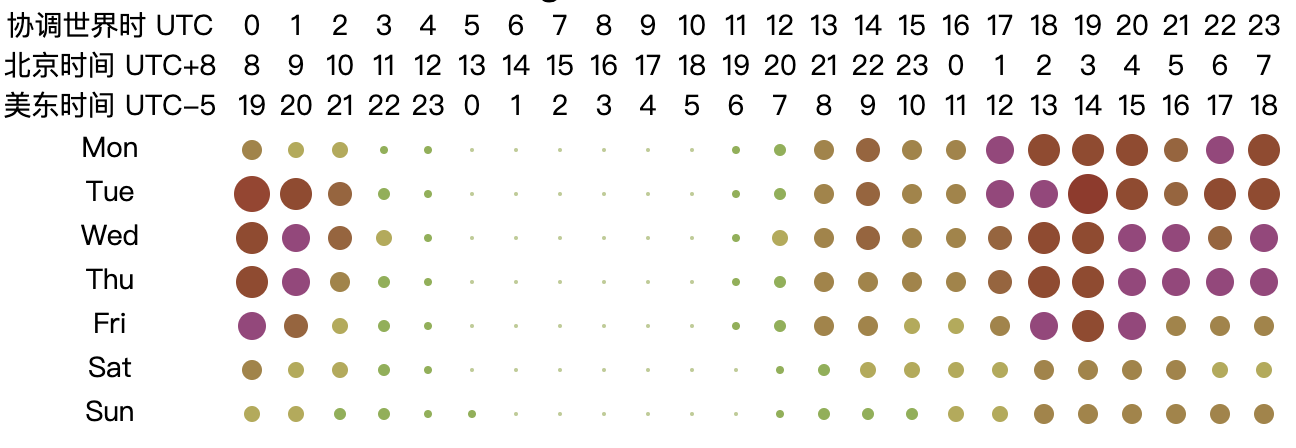

### llvm/llvm-project

In [36]:
import numpy as np
from clickhouse_driver import Client

# 配置远程 ClickHouse 的连接参数
client = Client(
    host='cc-2ze7189376o5m9759.public.clickhouse.ads.aliyuncs.com',
    port=9000,  # ClickHouse 默认端口为 9000
    user='user',
    password='password',
    database='database'  # 可选
)
# print(client.execute("SHOW TABLES"))


query = f"""
SELECT groupArray(count) AS data
FROM (SELECT toDayOfWeek(created_at) AS weekday, toHour(created_at) AS hour, COUNT() AS count
      FROM events
      WHERE toYear(created_at) = 2024
        and platform = 'GitHub'
        and repo_id = 75821432
      GROUP BY weekday, hour
      ORDER BY weekday, hour)
;
"""

result = client.execute(query)


data = result[0][0]

# 转换为 numpy 数组
data_array = np.array(data)

# Min-Max 放缩
data_min = data_array.min()
data_max = data_array.max()
scaled_data = 1 + (data_array - data_min) * (10 - 1) / (data_max - data_min)

# 结果保留到整数
scaled_data = scaled_data.astype(int)
# 输出放缩后的数据
scaled_data = scaled_data.tolist()  # 如果需要将其转为列表

# 转换为字符串并去掉空格
param = "[" + ",".join(map(str, scaled_data)) + "]"
print(param)

# 将这个param复制到 https://blog.frankzhao.cn/images/working_hour_distribution.svg?bg_color=white&text_color=black&data= 之后，可以得到一个svg图片

[1,1,1,1,1,2,2,3,4,5,4,4,4,6,6,7,8,8,8,6,6,6,5,5,4,3,3,3,2,3,3,4,5,5,4,5,4,6,7,8,9,10,7,7,7,6,5,5,4,3,3,3,3,3,3,4,5,5,5,4,5,6,7,7,8,8,7,6,6,6,5,4,3,3,2,2,2,3,3,4,5,5,5,5,5,6,7,7,8,8,7,6,6,6,5,5,3,3,2,2,2,3,3,4,4,5,4,4,4,5,6,7,7,7,7,6,5,5,4,4,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]


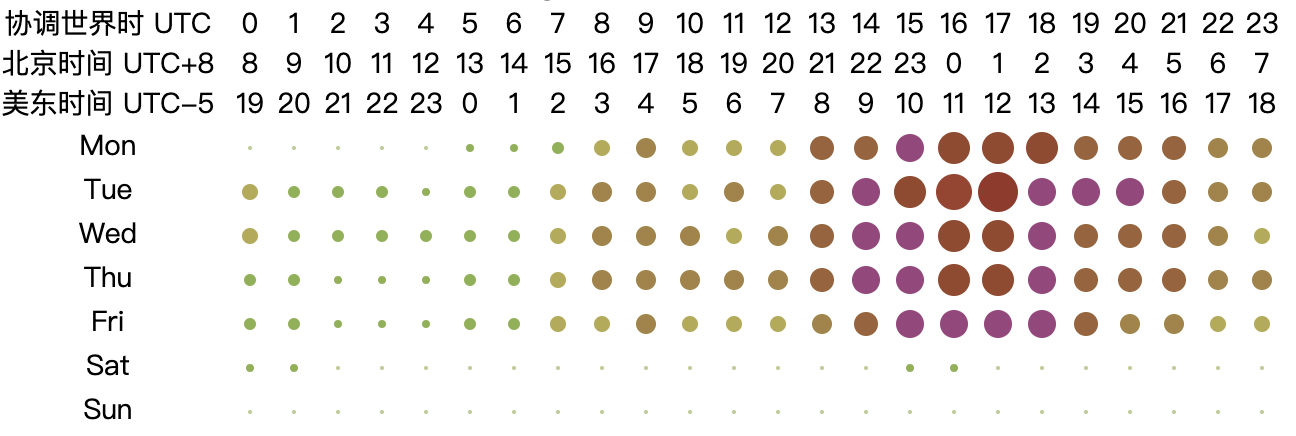

### home-assistant/core

In [37]:
import numpy as np
from clickhouse_driver import Client

# 配置远程 ClickHouse 的连接参数
client = Client(
    host='cc-2ze7189376o5m9759.public.clickhouse.ads.aliyuncs.com',
    port=9000,  # ClickHouse 默认端口为 9000
    user='user',
    password='password',
    database='database'  # 可选
)
# print(client.execute("SHOW TABLES"))


query = f"""
SELECT groupArray(count) AS data
FROM (SELECT toDayOfWeek(created_at) AS weekday, toHour(created_at) AS hour, COUNT() AS count
      FROM events
      WHERE toYear(created_at) = 2024
        and platform = 'GitHub'
        and repo_id = 12888993
      GROUP BY weekday, hour
      ORDER BY weekday, hour)
;
"""

result = client.execute(query)


data = result[0][0]

# 转换为 numpy 数组
data_array = np.array(data)

# Min-Max 放缩
data_min = data_array.min()
data_max = data_array.max()
scaled_data = 1 + (data_array - data_min) * (10 - 1) / (data_max - data_min)

# 结果保留到整数
scaled_data = scaled_data.astype(int)
# 输出放缩后的数据
scaled_data = scaled_data.tolist()  # 如果需要将其转为列表

# 转换为字符串并去掉空格
param = "[" + ",".join(map(str, scaled_data)) + "]"
print(param)

# 将这个param复制到 https://blog.frankzhao.cn/images/working_hour_distribution.svg?bg_color=white&text_color=black&data= 之后，可以得到一个svg图片

[2,1,1,1,1,1,4,6,8,8,7,8,8,9,8,8,7,7,8,9,8,7,5,3,2,2,1,1,1,2,5,7,9,8,8,7,8,8,8,9,8,7,7,8,10,6,5,3,2,2,1,1,1,2,5,6,7,8,8,7,8,9,9,8,8,7,7,9,7,7,5,3,2,2,2,1,1,2,4,7,8,8,7,6,7,6,7,8,7,6,7,7,7,6,4,2,2,1,2,1,1,1,4,7,8,9,8,8,8,8,8,8,6,6,7,6,6,5,4,3,2,1,1,1,1,1,2,3,5,5,6,5,5,5,5,5,5,5,5,6,6,6,4,2,2,2,1,1,1,1,1,2,3,5,6,5,6,6,6,6,6,6,6,7,8,7,4,3]


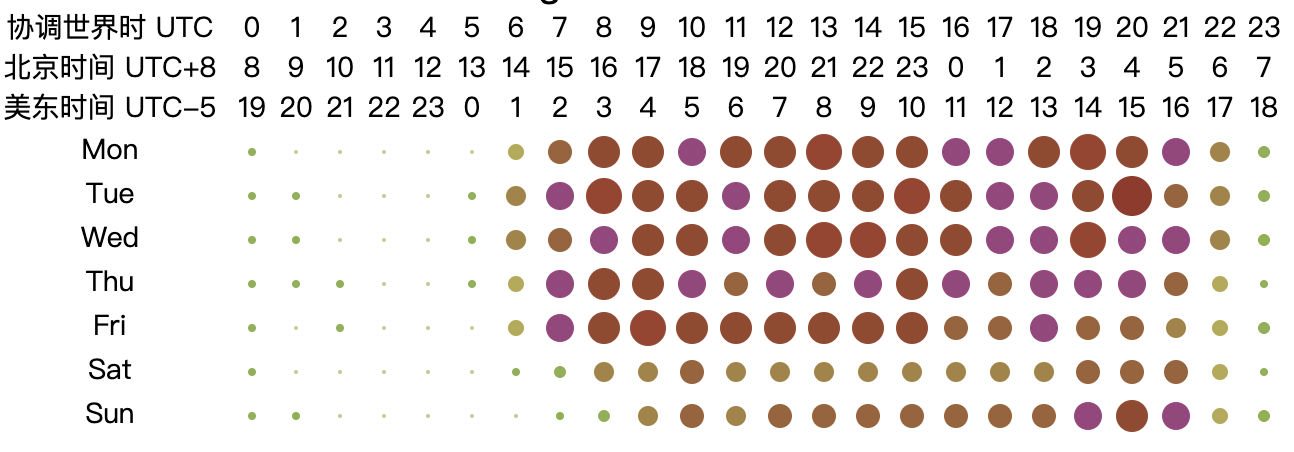

### pytorch/pytorch

In [38]:
import numpy as np
from clickhouse_driver import Client

# 配置远程 ClickHouse 的连接参数
client = Client(
    host='cc-2ze7189376o5m9759.public.clickhouse.ads.aliyuncs.com',
    port=9000,  # ClickHouse 默认端口为 9000
    user='user',
    password='password',
    database='database'  # 可选
)
# print(client.execute("SHOW TABLES"))


query = f"""
SELECT groupArray(count) AS data
FROM (SELECT toDayOfWeek(created_at) AS weekday, toHour(created_at) AS hour, COUNT() AS count
      FROM events
      WHERE toYear(created_at) = 2024
        and platform = 'GitHub'
        and repo_id = 65600975
      GROUP BY weekday, hour
      ORDER BY weekday, hour)
;
"""

result = client.execute(query)


data = result[0][0]

# 转换为 numpy 数组
data_array = np.array(data)

# Min-Max 放缩
data_min = data_array.min()
data_max = data_array.max()
scaled_data = 1 + (data_array - data_min) * (10 - 1) / (data_max - data_min)

# 结果保留到整数
scaled_data = scaled_data.astype(int)
# 输出放缩后的数据
scaled_data = scaled_data.tolist()  # 如果需要将其转为列表

# 转换为字符串并去掉空格
param = "[" + ",".join(map(str, scaled_data)) + "]"
print(param)

# 将这个param复制到 https://blog.frankzhao.cn/images/working_hour_distribution.svg?bg_color=white&text_color=black&data= 之后，可以得到一个svg图片

[2,5,5,3,2,3,3,3,2,2,1,1,2,2,4,5,6,7,8,7,7,8,8,7,7,9,6,5,4,5,4,4,3,3,2,2,2,3,4,5,6,8,9,8,8,9,8,7,8,7,7,5,4,4,4,3,3,3,2,2,2,3,5,6,7,8,9,8,8,9,8,8,8,9,7,5,4,4,4,4,3,2,2,2,2,3,4,6,7,8,8,7,8,8,7,7,8,10,7,5,5,5,6,3,3,2,1,1,2,3,4,6,6,8,8,7,7,7,7,6,6,7,5,2,2,2,1,1,1,1,1,1,1,1,1,2,2,2,2,1,1,2,2,1,2,4,5,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1]


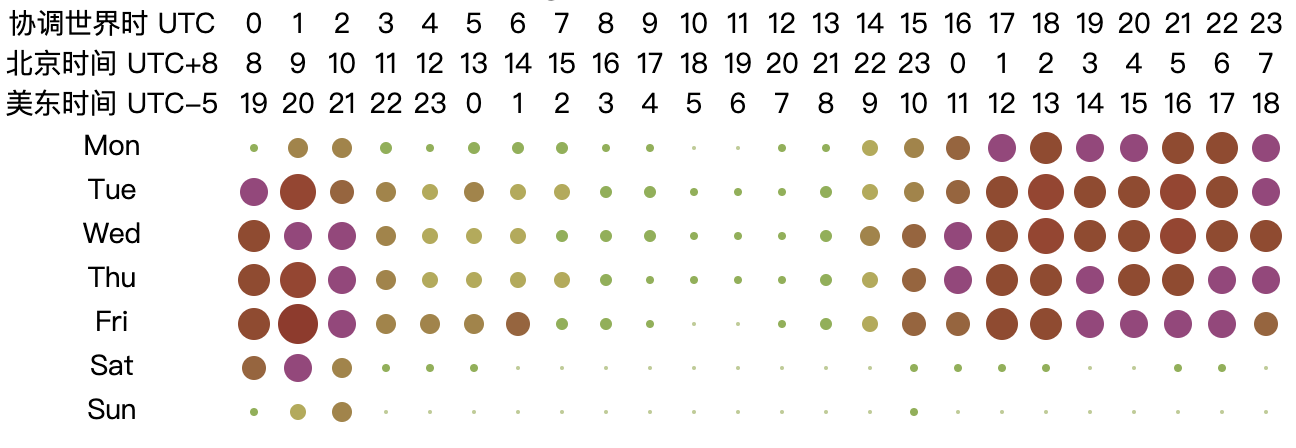

### openharmony

In [41]:
import numpy as np
from clickhouse_driver import Client

# 配置远程 ClickHouse 的连接参数
client = Client(
    host='cc-2ze7189376o5m9759.public.clickhouse.ads.aliyuncs.com',
    port=9000,  # ClickHouse 默认端口为 9000
    user='user',
    password='password',
    database='database'  # 可选
)
# print(client.execute("SHOW TABLES"))


query = f"""
SELECT groupArray(count) AS data
FROM (SELECT toDayOfWeek(created_at) AS weekday, toHour(created_at) AS hour, COUNT() AS count
      FROM events
      WHERE toYear(created_at) = 2024
        and platform = 'Gitee'
        and org_login = 'openharmony'
      GROUP BY weekday, hour
      ORDER BY weekday, hour)
;
"""

result = client.execute(query)


data = result[0][0]

# 转换为 numpy 数组
data_array = np.array(data)

# Min-Max 放缩
data_min = data_array.min()
data_max = data_array.max()
scaled_data = 1 + (data_array - data_min) * (10 - 1) / (data_max - data_min)

# 结果保留到整数
scaled_data = scaled_data.astype(int)
# 输出放缩后的数据
scaled_data = scaled_data.tolist()  # 如果需要将其转为列表

# 转换为字符串并去掉空格
param = "[" + ",".join(map(str, scaled_data)) + "]"
print(param)

# 将这个param复制到 https://blog.frankzhao.cn/images/working_hour_distribution.svg?bg_color=white&text_color=black&data= 之后，可以得到一个svg图片

[1,6,8,8,3,2,8,9,9,8,4,7,7,6,4,2,1,1,1,1,1,1,1,1,1,7,9,9,4,2,8,9,10,9,5,7,8,6,4,2,1,1,1,1,1,1,1,1,1,6,9,8,3,2,8,9,9,9,5,5,5,4,3,2,1,1,1,1,1,1,1,1,1,6,9,8,3,2,8,9,9,8,5,7,8,6,4,2,1,1,1,1,1,1,1,1,1,7,8,8,3,2,8,9,9,9,6,4,3,2,2,1,1,1,1,1,1,1,1,1,1,3,5,5,2,1,5,6,6,6,5,3,3,2,2,1,1,1,1,1,1,1,1,1,1,1,2,2,1,1,2,2,3,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1]


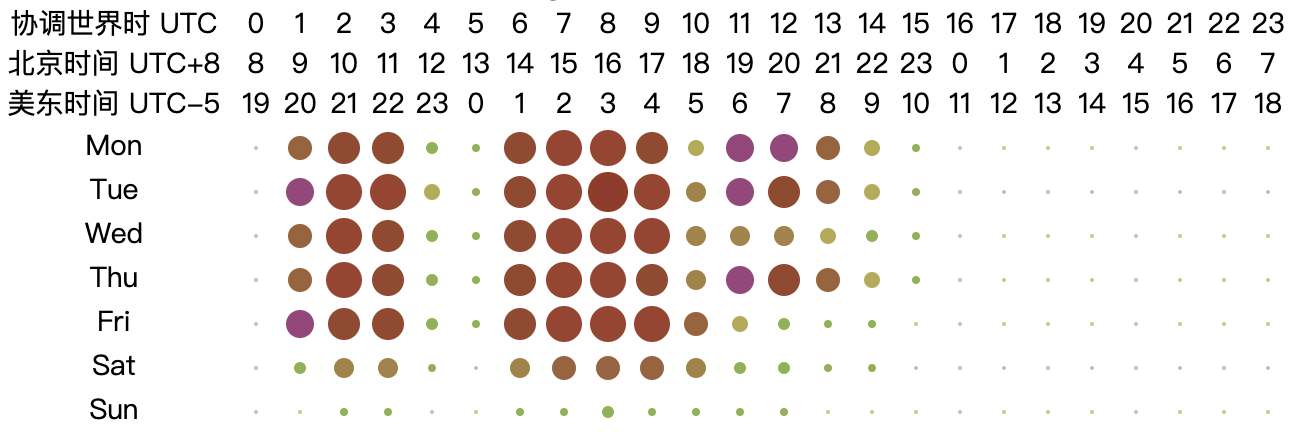

### mindspore

In [48]:
import numpy as np
from clickhouse_driver import Client

# 配置远程 ClickHouse 的连接参数
client = Client(
    host='cc-2ze7189376o5m9759.public.clickhouse.ads.aliyuncs.com',
    port=9000,  # ClickHouse 默认端口为 9000
    user='user',
    password='password',
    database='database'  # 可选
)
# print(client.execute("SHOW TABLES"))


query = f"""
SELECT groupArray(count) AS data
FROM (SELECT toDayOfWeek(created_at) AS weekday, toHour(created_at) AS hour, COUNT() AS count
      FROM events
      WHERE toYear(created_at) = 2024
        and platform = 'GitHub'
        and org_login = 'mindspore-ai'
      GROUP BY weekday, hour
      ORDER BY weekday, hour)
;
"""

result = client.execute(query)


data = result[0][0]

# 转换为 numpy 数组
data_array = np.array(data)

# Min-Max 放缩
data_min = data_array.min()
data_max = data_array.max()
scaled_data = 1 + (data_array - data_min) * (10 - 1) / (data_max - data_min)

# 结果保留到整数
scaled_data = scaled_data.astype(int)
# 输出放缩后的数据
scaled_data = scaled_data.tolist()  # 如果需要将其转为列表

# 转换为字符串并去掉空格
param = "[" + ",".join(map(str, scaled_data)) + "]"
print(param)

# 将这个param复制到 https://blog.frankzhao.cn/images/working_hour_distribution.svg?bg_color=white&text_color=black&data= 之后，可以得到一个svg图片

[1,2,3,3,3,1,2,3,4,2,2,2,2,2,2,1,1,1,1,1,1,1,1,2,3,2,3,1,2,2,3,3,2,2,2,4,2,1,1,1,1,1,1,1,1,1,1,2,10,2,2,2,2,4,4,3,3,1,2,1,1,1,1,1,1,1,1,1,1,1,1,3,2,2,3,1,3,3,3,2,3,1,2,2,2,1,1,1,1,1,1,1,1,1,2,2,3,2,2,2,3,3,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,1,2,2,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]


### DaoCloud

In [42]:
import numpy as np
from clickhouse_driver import Client

# 配置远程 ClickHouse 的连接参数
client = Client(
    host='cc-2ze7189376o5m9759.public.clickhouse.ads.aliyuncs.com',
    port=9000,  # ClickHouse 默认端口为 9000
    user='user',
    password='password',
    database='database'  # 可选
)
# print(client.execute("SHOW TABLES"))


query = f"""
SELECT groupArray(count) AS data
FROM (SELECT toDayOfWeek(created_at) AS weekday, toHour(created_at) AS hour, COUNT() AS count
      FROM events
      WHERE toYear(created_at) = 2024
        and platform = 'GitHub'
        and org_login = 'DaoCloud'
      GROUP BY weekday, hour
      ORDER BY weekday, hour)
;
"""

result = client.execute(query)


data = result[0][0]

# 转换为 numpy 数组
data_array = np.array(data)

# Min-Max 放缩
data_min = data_array.min()
data_max = data_array.max()
scaled_data = 1 + (data_array - data_min) * (10 - 1) / (data_max - data_min)

# 结果保留到整数
scaled_data = scaled_data.astype(int)
# 输出放缩后的数据
scaled_data = scaled_data.tolist()  # 如果需要将其转为列表

# 转换为字符串并去掉空格
param = "[" + ",".join(map(str, scaled_data)) + "]"
print(param)

# 将这个param复制到 https://blog.frankzhao.cn/images/working_hour_distribution.svg?bg_color=white&text_color=black&data= 之后，可以得到一个svg图片

[2,4,8,6,3,4,7,9,8,7,4,3,3,4,4,3,2,1,1,1,3,1,1,1,2,4,6,7,4,4,7,7,7,7,4,3,3,4,5,3,2,1,1,1,4,1,1,1,2,5,10,9,5,4,7,9,8,7,6,5,5,6,5,4,2,1,1,1,5,2,2,1,2,6,7,8,3,7,9,9,8,6,4,3,3,4,4,4,2,1,1,1,4,1,1,1,2,5,8,7,4,5,7,7,7,6,4,3,3,4,4,4,3,2,1,3,6,4,3,2,2,3,3,4,3,4,3,4,4,4,3,3,4,5,4,4,3,2,1,2,4,1,1,1,1,2,3,4,3,3,3,4,4,4,3,3,3,3,4,4,2,2,1,2,3,1,1,1]


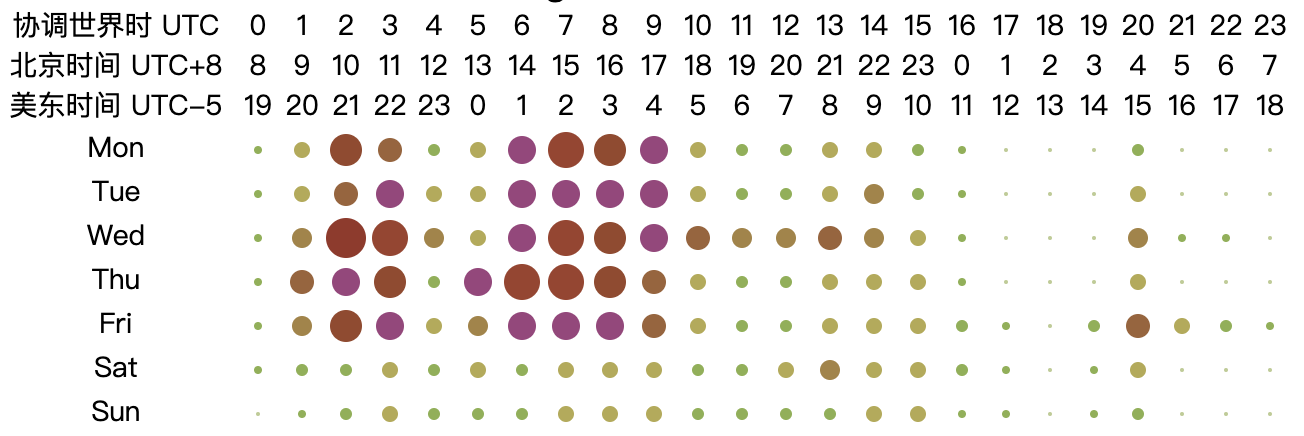

### PaddlePaddle

In [45]:
import numpy as np
from clickhouse_driver import Client

# 配置远程 ClickHouse 的连接参数
client = Client(
    host='cc-2ze7189376o5m9759.public.clickhouse.ads.aliyuncs.com',
    port=9000,  # ClickHouse 默认端口为 9000
    user='user',
    password='password',
    database='database'  # 可选
)
# print(client.execute("SHOW TABLES"))


query = f"""
SELECT groupArray(count) AS data
FROM (SELECT toDayOfWeek(created_at) AS weekday, toHour(created_at) AS hour, COUNT() AS count
      FROM events
      WHERE toYear(created_at) = 2024
        and platform = 'GitHub'
        and repo_id = 65711522
      GROUP BY weekday, hour
      ORDER BY weekday, hour)
;
"""

result = client.execute(query)


data = result[0][0]

# 转换为 numpy 数组
data_array = np.array(data)

# Min-Max 放缩
data_min = data_array.min()
data_max = data_array.max()
scaled_data = 1 + (data_array - data_min) * (10 - 1) / (data_max - data_min)

# 结果保留到整数
scaled_data = scaled_data.astype(int)
# 输出放缩后的数据
scaled_data = scaled_data.tolist()  # 如果需要将其转为列表

# 转换为字符串并去掉空格
param = "[" + ",".join(map(str, scaled_data)) + "]"
print(param)

# 将这个param复制到 https://blog.frankzhao.cn/images/working_hour_distribution.svg?bg_color=white&text_color=black&data= 之后，可以得到一个svg图片

[1,2,5,6,2,2,5,4,4,3,2,3,2,2,1,1,1,1,1,1,1,1,1,1,1,2,5,5,2,2,10,4,4,3,2,3,2,2,1,1,1,1,1,1,1,1,1,1,1,2,5,6,2,2,5,5,4,3,2,3,3,2,1,1,1,1,1,1,1,1,1,1,1,2,5,6,2,2,5,4,4,3,2,3,2,1,1,1,1,1,1,1,1,1,1,1,1,2,6,5,2,2,4,4,4,3,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]


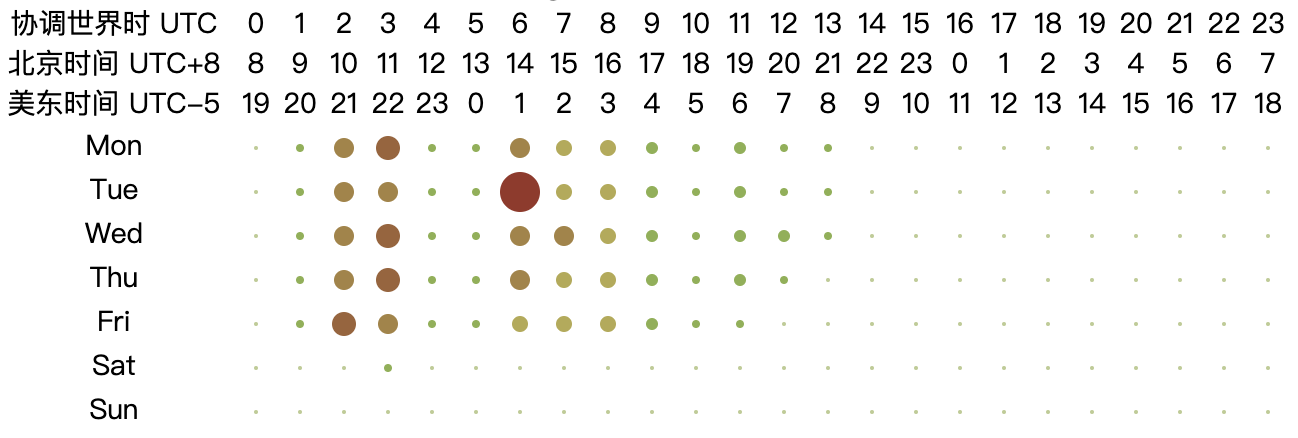

### Apache/doris

In [46]:
from clickhouse_driver import Client
import numpy as np


# 配置远程 ClickHouse 的连接参数
client = Client(
    host='cc-2ze7189376o5m9759.public.clickhouse.ads.aliyuncs.com',
    port=9000,  # ClickHouse 默认端口为 9000
    user='user',
    password='password',
    database='database'  # 可选
)
# print(client.execute("SHOW TABLES"))


query = f"""
SELECT groupArray(count) AS data
FROM (SELECT toDayOfWeek(created_at) AS weekday, toHour(created_at) AS hour, COUNT() AS count
      FROM events
      WHERE toYear(created_at) = 2024
        and platform = 'GitHub'
        and repo_id = 99919302
      GROUP BY weekday, hour
      ORDER BY weekday, hour)
;
"""

result = client.execute(query)


data = result[0][0]

# 转换为 numpy 数组
data_array = np.array(data)

# Min-Max 放缩
data_min = data_array.min()
data_max = data_array.max()
scaled_data = 1 + (data_array - data_min) * (10 - 1) / (data_max - data_min)

# 结果保留到整数
scaled_data = scaled_data.astype(int)
# 输出放缩后的数据
scaled_data = scaled_data.tolist()  # 如果需要将其转为列表

# 转换为字符串并去掉空格
param = "[" + ",".join(map(str, scaled_data)) + "]"
print(param)

# 将这个param复制到 https://blog.frankzhao.cn/images/working_hour_distribution.svg?bg_color=white&text_color=black&data= 之后，可以得到一个svg图片

[1,3,8,8,5,3,7,8,8,8,6,6,5,4,4,3,2,1,1,1,1,1,1,1,1,3,9,9,6,3,8,9,8,9,6,7,6,5,4,4,2,1,1,1,1,1,1,1,1,4,9,9,6,4,8,9,8,8,6,7,5,5,5,4,2,1,1,1,1,1,1,1,1,3,8,10,6,4,8,9,8,8,6,6,6,5,4,3,2,1,1,1,1,1,1,1,1,3,7,8,5,3,7,9,8,8,6,5,4,3,3,3,2,1,1,1,1,1,1,1,1,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,2,2,2,1,2,2,2,3,3,2,3,2,2,2,1,1,1,1,1,1,1,1]


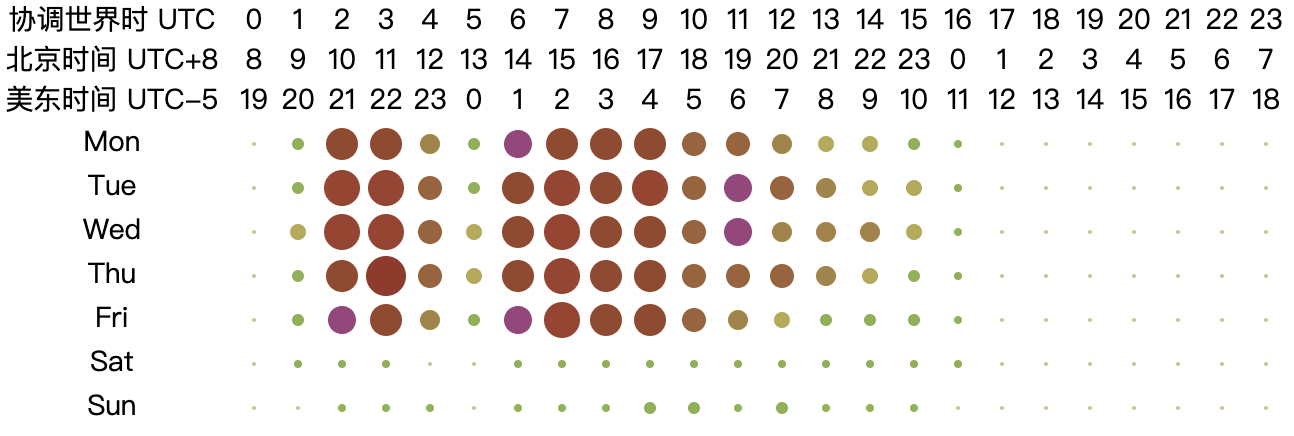

## 开发者角色分析

### 角色分析

In [2]:
from clickhouse_driver import Client
import numpy as np
import pandas as pd

# 配置远程 ClickHouse 的连接参数
client = Client(
    host='cc-2ze7189376o5m9759.public.clickhouse.ads.aliyuncs.com',
    port=9000,  # ClickHouse 默认端口为 9000
    user='user',
    password='password',
    database='database'  # 可选
)
# print(client.execute("SHOW TABLES"))


# 定义仓库列表
repositories = [
    "NixOS/nixpkgs",
    "llvm/llvm-project",
    "home-assistant/core",
    "pytorch/pytorch",
    "digitalinnovationone/dio-lab-open-source",
    "odoo/odoo",
    "microsoft/vscode",
    "elastic/kibana",
    "zephyrproject-rtos/zephyr",
    "godotengine/godot"
]

# 初始化一个空的 DataFrame
results_table = pd.DataFrame(
    columns=["repo_name", "pr", "issue", "rv", "star"])

for repo_name in repositories:
    query = f"""
    with star_user as (
             select count(distinct actor_id) as cnt
             from events
             where type = 'WatchEvent'
               and repo_name = '{repo_name}'
               and platform = 'GitHub'
               and toYear(created_at) = 2024
         ),
         issue_user as (
             select count(distinct actor_id) as cnt
             from events
             where type In ('IssuesEvent')
               and action in ('opened', 'reopened', 'added')
               and repo_name = '{repo_name}'
               and platform = 'GitHub'
               and toYear(created_at) = 2024
         ),
         pr_user as (
             select count(distinct actor_id) as cnt
             from events
             where type = 'PullRequestEvent'
               and action = 'opened'
               and repo_name = '{repo_name}'
               and platform = 'GitHub'
               and toYear(created_at) = 2024
         ),
         rv_user as (
             select count(distinct actor_id) as cnt
             from events
             where repo_name = '{repo_name}'
               and type = 'PullRequestReviewEvent'
               and toYear(created_at) = 2024
         )
    select 'rv', sum(*)
    from rv_user
    union all
    select 'pr', sum(*) as cnt
    from pr_user
    union all
    select 'issue', sum(*) as cnt
    from issue_user
    union all
    select 'star', sum(*) as cnt
    from star_user;
    """

    # 执行查询
    result = client.execute(query)

    # 将查询结果处理成字典
    result_dict = {k: v for k, v in result}

    # 添加 repo_name 到结果
    result_dict["repo_name"] = repo_name

    # 将字典转为 DataFrame 并使用 pd.concat 合并
    results_table = pd.concat(
        [results_table, pd.DataFrame([result_dict])], ignore_index=True)

# 调整列的顺序
results_table = results_table[["repo_name", "pr", "issue", "rv", "star"]]

# 打印结果表格
print(results_table)

                                  repo_name     pr  issue    rv   star
0                             NixOS/nixpkgs   4339   3606  3484   4897
1                         llvm/llvm-project   2365   3241  2092   6789
2                       home-assistant/core   1300   7472   989  10596
3                           pytorch/pytorch   1424   2599   823  12513
4  digitalinnovationone/dio-lab-open-source  21276   4462   224   3813
5                                 odoo/odoo   1035    650   661   7659
6                          microsoft/vscode    579  12522   388  14701
7                            elastic/kibana    437    852   452   1298
8                 zephyrproject-rtos/zephyr   1276   1054  1120   2314
9                         godotengine/godot   1072   3314   678  15208


### 新增的角色

In [3]:
from clickhouse_driver import Client
import numpy as np


# 配置远程 ClickHouse 的连接参数
client = Client(
    host='cc-2ze7189376o5m9759.public.clickhouse.ads.aliyuncs.com',
    port=9000,  # ClickHouse 默认端口为 9000
    user='user',
    password='password',
    database='database'  # 可选
)
# print(client.execute("SHOW TABLES"))


# 定义仓库列表
repositories = [
    "NixOS/nixpkgs",
    "llvm/llvm-project",
    "home-assistant/core",
    "pytorch/pytorch",
    "digitalinnovationone/dio-lab-open-source",
    "odoo/odoo",
    "microsoft/vscode",
    "elastic/kibana",
    "zephyrproject-rtos/zephyr",
    "godotengine/godot"
]

# 初始化一个空的 DataFrame
results_table = pd.DataFrame(
    columns=["repo_name", "pr", "issue", "rv", "star"])

for repo_name in repositories:
    query = f"""
    with star_pre as (select distinct actor_id
                      from events
                      where type = 'WatchEvent'
                        and repo_name = '{repo_name}'
                        and platform = 'GitHub'
                        and toYear(created_at) < 2024),
         star_user as (
             select count(distinct actor_id) as cnt
             from events
             where type = 'WatchEvent'
               and repo_name = '{repo_name}'
               and platform = 'GitHub'
               and toYear(created_at) = 2024
               and actor_id not in star_pre
         ),
         issue_pre as (select distinct actor_id
                       from events
                       where type In ('IssuesEvent')
                         and action in ('opened', 'reopened', 'added')
                         and repo_name = '{repo_name}'
                         and platform = 'GitHub'
                         and toYear(created_at) < 2024),
         issue_user as (
             select count(distinct actor_id) as cnt
             from events
             where type In ('IssuesEvent')
               and action in ('opened', 'reopened', 'added')
               and repo_name = '{repo_name}'
               and platform = 'GitHub'
               and toYear(created_at) = 2024
               and actor_id not in issue_pre
         ),
         pr_pre as (select distinct actor_id
                    from events
                    where type = 'PullRequestEvent'
                      and action = 'opened'
                      and repo_name = '{repo_name}'
                      and platform = 'GitHub'
                      and toYear(created_at) < 2024),
         pr_user as (
             select count(distinct actor_id) as cnt
             from events
             where type = 'PullRequestEvent'
               and action = 'opened'
               and repo_name = '{repo_name}'
               and platform = 'GitHub'
               and toYear(created_at) = 2024
               and actor_id not in pr_pre
         ),
         rv_user_pre as (
             select distinct actor_id
             from events
             where repo_name = '{repo_name}'
               and type = 'PullRequestReviewEvent'
               and toYear(created_at) < 2024
         ),
         rv_user as (
             select count(distinct actor_id) as cnt
             from events
             where repo_name = '{repo_name}'
               and type = 'PullRequestReviewEvent'
               and toYear(created_at) = 2024
               and actor_id not in rv_user_pre
         )
    select 'rv', sum(*)
    from rv_user
    union all
    select 'pr', sum(*) as cnt
    from pr_user
    union all
    select 'issue', sum(*) as cnt
    from issue_user
    union all
    select 'star', sum(*) as cnt
    from star_user;
    """

    # 执行查询
    result = client.execute(query)

    # 将查询结果处理成字典
    result_dict = {k: v for k, v in result}

    # 添加 repo_name 到结果
    result_dict["repo_name"] = repo_name

    # 将字典转为 DataFrame 并使用 pd.concat 合并
    results_table = pd.concat(
        [results_table, pd.DataFrame([result_dict])], ignore_index=True)

# 调整列的顺序
results_table = results_table[["repo_name", "pr", "issue", "rv", "star"]]

# 打印结果表格
print(results_table)

                                  repo_name     pr  issue    rv   star
0                             NixOS/nixpkgs   2187   2392  1605   4836
1                         llvm/llvm-project   1517   2191  1223   6689
2                       home-assistant/core    819   5502   565  10483
3                           pytorch/pytorch    946   1938   496  12321
4  digitalinnovationone/dio-lab-open-source  21254   4455   224   3809
5                                 odoo/odoo    467    445   239   7559
6                          microsoft/vscode    450  10614   312  14416
7                            elastic/kibana    155    472   117   1280
8                 zephyrproject-rtos/zephyr    690    687   554   2278
9                         godotengine/godot    738   2216   445  14774


| repo_name                             |   star  |  issue |   pr  |   rv  |
|---------------------------------------|---------|--------|-------|-------|
| NixOS/nixpkgs                         |    4836 |   2392 |  2187 |  1605 |
| llvm/llvm-project                     |    6689 |   2191 |  1517 |  1223 |
| home-assistant/core                   |   10483 |   5502 |   819 |   565 |
| pytorch/pytorch                       |   12321 |   1938 |   946 |   496 |
| digitalinnovationone/dio-lab-open-source |    3809 |   4455 | 21254 |   224 |
| odoo/odoo                             |    7559 |    445 |   467 |   239 |
| microsoft/vscode                      |   14416 |  10614 |   450 |   312 |
| DigitalPlatDev/FreeDomain             |   32967 |  35332 |     3 |     0 |
| zephyrproject-rtos/zephyr             |    2278 |    687 |   690 |   554 |
| godotengine/godot                     |   14774 |   2216 |   738 |   445 |


### 演化的角色

In [4]:
from clickhouse_driver import Client
import numpy as np


# 配置远程 ClickHouse 的连接参数
client = Client(
    host='cc-2ze7189376o5m9759.public.clickhouse.ads.aliyuncs.com',
    port=9000,  # ClickHouse 默认端口为 9000
    user='user',
    password='password',
    database='database'  # 可选
)
# print(client.execute("SHOW TABLES"))


# 定义仓库列表
repositories = [
    "NixOS/nixpkgs",
    "llvm/llvm-project",
    "home-assistant/core",
    "pytorch/pytorch",
    "digitalinnovationone/dio-lab-open-source",
    "odoo/odoo",
    "microsoft/vscode",
    "elastic/kibana",
    "zephyrproject-rtos/zephyr",
    "godotengine/godot"
]

# 初始化一个空的 DataFrame
results_table = pd.DataFrame(
    columns=["repo_name", "rv", "pr", "issue"])

for repo_name in repositories:
    query = f"""
    -- 新增指标sql，加上pre的条件判断就能变成演化的sql
with star_pre as (select distinct actor_id
                  from events
                  where type = 'WatchEvent'
                    and repo_name = '{repo_name}'
                    and platform = 'GitHub'
                    and toYear(created_at) < 2024),
     star_user as (
         select count(distinct actor_id) as cnt
         from events
         where type = 'WatchEvent'
           and repo_name = '{repo_name}'
           and platform = 'GitHub'
           and toYear(created_at) = 2024
           and actor_id not in star_pre
     ),
     issue_pre as (select distinct actor_id
                   from events
                   where type In ('IssuesEvent')
                     and action in ('opened', 'reopened', 'added')
                     and repo_name = '{repo_name}'
                     and platform = 'GitHub'
                     and toYear(created_at) < 2024),
     issue_user as (
         select count(distinct actor_id) as cnt
         from events
         where type In ('IssuesEvent')
           and action in ('opened', 'reopened', 'added')
           and repo_name = '{repo_name}'
           and platform = 'GitHub'
           and toYear(created_at) = 2024
           and actor_id not in issue_pre
           and actor_id in star_pre
     ),
     pr_pre as (select distinct actor_id
                from events
                where type = 'PullRequestEvent'
                  and action = 'opened'
                  and repo_name = '{repo_name}'
                  and platform = 'GitHub'
                  and toYear(created_at) < 2024),
     pr_user as (
         select count(distinct actor_id) as cnt
         from events
         where type = 'PullRequestEvent'
           and action = 'opened'
           and repo_name = '{repo_name}'
           and platform = 'GitHub'
           and toYear(created_at) = 2024
           and actor_id not in pr_pre
           and actor_id in issue_pre
     ),

     rv_user_pre as (
         select distinct actor_id
         from events
         where repo_name = '{repo_name}'
           and type = 'PullRequestReviewEvent'
           and toYear(created_at) < 2024
     ),
     rv_user as (
         select count(distinct actor_id) as cnt
         from events
         where repo_name = '{repo_name}'
           and type = 'PullRequestReviewEvent'
           and toYear(created_at) = 2024
           and actor_id not in rv_user_pre
           and actor_id in pr_pre
     )
select 'rv', sum(*)
from rv_user
union all
select 'pr', sum(*) as cnt
from pr_user
union all
select 'issue', sum(*) as cnt
from issue_user;
    """

    # 执行查询
    result = client.execute(query)

    # 将查询结果处理成字典
    result_dict = {k: v for k, v in result}

    # 添加 repo_name 到结果
    result_dict["repo_name"] = repo_name

    # 将字典转为 DataFrame 并使用 pd.concat 合并
    results_table = pd.concat(
        [results_table, pd.DataFrame([result_dict])], ignore_index=True)

# 调整列的顺序
results_table = results_table[["repo_name", "rv", "pr", "issue"]]

# 打印结果表格
print(results_table)

                                  repo_name   rv   pr issue
0                             NixOS/nixpkgs  287  188   204
1                         llvm/llvm-project  134  289   185
2                       home-assistant/core   66  103   155
3                           pytorch/pytorch   82   78   168
4  digitalinnovationone/dio-lab-open-source    0   21     3
5                                 odoo/odoo   48   33    28
6                          microsoft/vscode   23   50   272
7                            elastic/kibana   12   26     3
8                 zephyrproject-rtos/zephyr   62   45    46
9                         godotengine/godot   67  115   242


| 仓库名                            |   贡献者 -> 提交者  | 参与者 -> 贡献者  | 探索者 -> 参与者 |
|---------------------------------------|-------|------|-------|
| NixOS/nixpkgs                         |   287 |  188 |   204 |
| llvm/llvm-project                     |   134 |  289 |   185 |
| home-assistant/core                   |    66 |  103 |   155 |
| pytorch/pytorch                       |    82 |   78 |   168 |
| digitalinnovationone/dio-lab-open-source |     0 |   21 |     3 |
| odoo/odoo                             |    48 |   33 |    28 |
| microsoft/vscode                      |    23 |   50 |   272 |
| DigitalPlatDev/FreeDomain             |     0 |    0 |     0 |
| zephyrproject-rtos/zephyr             |    62 |   45 |    46 |
| godotengine/godot                     |    67 |  115 |   242 |
